In [2]:
from transformers import pipeline
from transformers import AutoTokenizer
import pandas as pd
import jieba
import pickle
import re

### 读入并清洗文本

定义函数，使得字符串中只保留汉字和句号

In [3]:
def is_chinese(uchar):
    if (uchar >= u'\u4e00' and uchar <= u'\u9fa5') or uchar==u'\u3002':  
    # 判断一个uchar是否是汉字,或者句号，用Unicode编码判断
        return True
    else:
        return False
 
def allcontents(contents):
    content = ''
    for i in contents:
        if is_chinese(i):
            content = content+i
    return content
    #print('\n处理后的句子为:\n'+content)

In [38]:
file_path = 'Text//test10.txt'
clear_txt = [] # 创建列表以存储读取文本的字符串列表

with open(file_path,'r') as f:
    content = f.readlines()
    for i in content:
        clear_txt.append(allcontents(i))
    #print(content)

# 在每个句子后添加换行符号 '\n'
for i in range(len(clear_txt)):
    clear_txt[i] = clear_txt[i].replace('。','。\n')

# 将字符串列表写入新文件
with open(file_path.replace('.txt','')+'_clear.txt','w') as f:
    f.writelines(clear_txt)

### 清洗词典

In [18]:
dictionary = ''
with open('dictionary.txt','r') as f:
    dictionary = f.read()
    
dictionary = dictionary.replace('、','\n')
dictionary = dictionary.replace('，','\n')
dictionary = dictionary.replace(' ','')

with open("dictionary_clear.txt", 'w') as f:
    f.write(dictionary)

### 计算包含词库中词的句子数量

In [39]:
text_name = file_path.replace('.txt','')+'_clear.txt'
dictionary = []
text = []
count = 0.0

with open(text_name, 'r') as f:
    text = [k.strip() for k in f.readlines()]

with open('dictionary_clear.txt', 'r') as f:
    dictionary = [k.strip() for k in f.readlines()]

# 删除词库中重复的词
dictionary = list(set(dictionary))
dictionary.pop(0)  # 字典最前方有个空字符串，要删掉，不然会对匹配结果造成影响
total_sentence = len(text)

for i in range(len(dictionary)):
    temp = []
    for j in range(len(text)):
        if dictionary[i] in text[j]:
            count += 1
            temp.append(j)
    temp.reverse()  # 对索引进行反转，从后往前删除，否则会出错
    for k in temp:
        del text[k] # 删除已经计算过的句子，以防该句子不同的词重复计算
           

In [34]:
print(dictionary)

['颗粒物', '水力发电设施', '毁灭性飓风', '灰池', '燃煤', '核电厂', '全球变暖', '化石发电', '冬季', '灾难天气', 'hcfcs,cfcs', '绿色', '灾害', '干燥天气', '废能源', '排放温室气体', '超洁净', '严冬', '大型太阳能', '洪涝灾害', '地震洪水', '创纪录的降雪', '水电', '余热', '破坏风暴', '发电厂', '粉末活化', '更严格的环境', '荒漠化', '常规发电', '电动机', '大飓风袭击', '碳中性', '废气', '氮氧化物控制', '有害空气污染物', '风能太阳能项目', '煤粉', 's02', '天然气', '由于大雨', '潮湿的天气状况', '较冷的天气', '严重干旱', '深度冻结', '凉爽的夏天', '异常天气', '龙卷风冰雹', '异常天气模式', '生物燃料', '风暴活动', '极端寒冷天气', '一氧化碳', '异常潮湿', '绿色能源', '泥石流', '热电联产设施', '热', '核电站', '氮氧化物燃烧器', '气候保护', '上岸', '降雨洪水', '飓风', '凉爽的春天', '融雪', '环境敏感区', '减少温室', '飓风地震', '潮湿天气', '影响飓风', '飓风登陆', '生物多样性', '洪水发生', '极端天气状况', '火山', '反常天气', '缺水', '异常寒冷', '岸风', '二氧化碳捕获', '反常寒冷', '温和正常', '煤炭燃烧', '碳氢化合物', '排放监测', '冰雹风暴', '严酷的冬季', '煤灰', '空气排放', '自然资源', '水排放', '大雪暴', '清洁燃烧', '反常', '化石燃料', '结合热电厂', '尾气排放', '飓风袭击', '火电', '硫氧化物', '燃气火电厂', '陆上风电场', '二氧化氮排放', '可持续发展', '可再生天然气', '温暖的冬天', '碳捕集', '地震飓风', '天气状况', '极端天气', '异常寒冷的天气', '水资源短缺', '降水', '减少污染', '异常恶劣天气', '飓风热带风暴', '温室气体', '太阳能太阳能', '较冷的正常', '冷温度', '凉爽天气', '浮游生物', '环境排放

In [35]:
print(dictionary)
print(text)
print(count)
print(total_sentence)
print(count/total_sentence)

['颗粒物', '水力发电设施', '毁灭性飓风', '灰池', '燃煤', '核电厂', '全球变暖', '化石发电', '冬季', '灾难天气', 'hcfcs,cfcs', '绿色', '灾害', '干燥天气', '废能源', '排放温室气体', '超洁净', '严冬', '大型太阳能', '洪涝灾害', '地震洪水', '创纪录的降雪', '水电', '余热', '破坏风暴', '发电厂', '粉末活化', '更严格的环境', '荒漠化', '常规发电', '电动机', '大飓风袭击', '碳中性', '废气', '氮氧化物控制', '有害空气污染物', '风能太阳能项目', '煤粉', 's02', '天然气', '由于大雨', '潮湿的天气状况', '较冷的天气', '严重干旱', '深度冻结', '凉爽的夏天', '异常天气', '龙卷风冰雹', '异常天气模式', '生物燃料', '风暴活动', '极端寒冷天气', '一氧化碳', '异常潮湿', '绿色能源', '泥石流', '热电联产设施', '热', '核电站', '氮氧化物燃烧器', '气候保护', '上岸', '降雨洪水', '飓风', '凉爽的春天', '融雪', '环境敏感区', '减少温室', '飓风地震', '潮湿天气', '影响飓风', '飓风登陆', '生物多样性', '洪水发生', '极端天气状况', '火山', '反常天气', '缺水', '异常寒冷', '岸风', '二氧化碳捕获', '反常寒冷', '温和正常', '煤炭燃烧', '碳氢化合物', '排放监测', '冰雹风暴', '严酷的冬季', '煤灰', '空气排放', '自然资源', '水排放', '大雪暴', '清洁燃烧', '反常', '化石燃料', '结合热电厂', '尾气排放', '飓风袭击', '火电', '硫氧化物', '燃气火电厂', '陆上风电场', '二氧化氮排放', '可持续发展', '可再生天然气', '温暖的冬天', '碳捕集', '地震飓风', '天气状况', '极端天气', '异常寒冷的天气', '水资源短缺', '降水', '减少污染', '异常恶劣天气', '飓风热带风暴', '温室气体', '太阳能太阳能', '较冷的正常', '冷温度', '凉爽天气', '浮游生物', '环境排放

In [37]:
print(dictionary)
print(text)
print(count)
print(total_sentence)
print(count/total_sentence)

['颗粒物', '水力发电设施', '毁灭性飓风', '灰池', '燃煤', '核电厂', '全球变暖', '化石发电', '冬季', '灾难天气', 'hcfcs,cfcs', '绿色', '灾害', '干燥天气', '废能源', '排放温室气体', '超洁净', '严冬', '大型太阳能', '洪涝灾害', '地震洪水', '创纪录的降雪', '水电', '余热', '破坏风暴', '发电厂', '粉末活化', '更严格的环境', '荒漠化', '常规发电', '电动机', '大飓风袭击', '碳中性', '废气', '氮氧化物控制', '有害空气污染物', '风能太阳能项目', '煤粉', 's02', '天然气', '由于大雨', '潮湿的天气状况', '较冷的天气', '严重干旱', '深度冻结', '凉爽的夏天', '异常天气', '龙卷风冰雹', '异常天气模式', '生物燃料', '风暴活动', '极端寒冷天气', '一氧化碳', '异常潮湿', '绿色能源', '泥石流', '热电联产设施', '热', '核电站', '氮氧化物燃烧器', '气候保护', '上岸', '降雨洪水', '飓风', '凉爽的春天', '融雪', '环境敏感区', '减少温室', '飓风地震', '潮湿天气', '影响飓风', '飓风登陆', '生物多样性', '洪水发生', '极端天气状况', '火山', '反常天气', '缺水', '异常寒冷', '岸风', '二氧化碳捕获', '反常寒冷', '温和正常', '煤炭燃烧', '碳氢化合物', '排放监测', '冰雹风暴', '严酷的冬季', '煤灰', '空气排放', '自然资源', '水排放', '大雪暴', '清洁燃烧', '反常', '化石燃料', '结合热电厂', '尾气排放', '飓风袭击', '火电', '硫氧化物', '燃气火电厂', '陆上风电场', '二氧化氮排放', '可持续发展', '可再生天然气', '温暖的冬天', '碳捕集', '地震飓风', '天气状况', '极端天气', '异常寒冷的天气', '水资源短缺', '降水', '减少污染', '异常恶劣天气', '飓风热带风暴', '温室气体', '太阳能太阳能', '较冷的正常', '冷温度', '凉爽天气', '浮游生物', '环境排放

In [39]:
print(dictionary)
print(text)
print(count)
print(total_sentence)
print(count/total_sentence)

['颗粒物', '水力发电设施', '毁灭性飓风', '灰池', '燃煤', '核电厂', '全球变暖', '化石发电', '冬季', '灾难天气', 'hcfcs,cfcs', '绿色', '灾害', '干燥天气', '废能源', '排放温室气体', '超洁净', '严冬', '大型太阳能', '洪涝灾害', '地震洪水', '创纪录的降雪', '水电', '余热', '破坏风暴', '发电厂', '粉末活化', '更严格的环境', '荒漠化', '常规发电', '电动机', '大飓风袭击', '碳中性', '废气', '氮氧化物控制', '有害空气污染物', '风能太阳能项目', '煤粉', 's02', '天然气', '由于大雨', '潮湿的天气状况', '较冷的天气', '严重干旱', '深度冻结', '凉爽的夏天', '异常天气', '龙卷风冰雹', '异常天气模式', '生物燃料', '风暴活动', '极端寒冷天气', '一氧化碳', '异常潮湿', '绿色能源', '泥石流', '热电联产设施', '热', '核电站', '氮氧化物燃烧器', '气候保护', '上岸', '降雨洪水', '飓风', '凉爽的春天', '融雪', '环境敏感区', '减少温室', '飓风地震', '潮湿天气', '影响飓风', '飓风登陆', '生物多样性', '洪水发生', '极端天气状况', '火山', '反常天气', '缺水', '异常寒冷', '岸风', '二氧化碳捕获', '反常寒冷', '温和正常', '煤炭燃烧', '碳氢化合物', '排放监测', '冰雹风暴', '严酷的冬季', '煤灰', '空气排放', '自然资源', '水排放', '大雪暴', '清洁燃烧', '反常', '化石燃料', '结合热电厂', '尾气排放', '飓风袭击', '火电', '硫氧化物', '燃气火电厂', '陆上风电场', '二氧化氮排放', '可持续发展', '可再生天然气', '温暖的冬天', '碳捕集', '地震飓风', '天气状况', '极端天气', '异常寒冷的天气', '水资源短缺', '降水', '减少污染', '异常恶劣天气', '飓风热带风暴', '温室气体', '太阳能太阳能', '较冷的正常', '冷温度', '凉爽天气', '浮游生物', '环境排放

In [40]:
print(dictionary)
print(text)
print(count)
print(total_sentence)
print(count/total_sentence)

['pm2.5', '核电水电', '有害空气污染物', '生物质能火电厂', '排放剖面', '汞排放', '降雨洪水', '异常温暖的天气', '排放', '暴雨洪水', '寒潮', '核能', '作物歉收', '碳中性', '异常潮湿的天气', '大型太阳能', '暖冬', '分布式太阳能', '二氧化硫', '无污染', '风力资源', '可再生天然气', '上岸', '更严格的环境', '公用事业规模太阳能发电', '排放温室气体', '塑料垃圾', '应对气候变化', '荒漠化', '潮湿的天气状况', '碳密集', '濒危', '风暴风暴', '干燥天气条件', '雪冰风暴', '飓风季节', '减少污染', '煤粉', '生物质能发电厂', '冰雹损害', '可再生燃料', '非季节性天气', '飓风相关', '可再生的任务', '超级风暴', '污染控制', '常规发电', '电力燃气', '电动机', '环境保护', '暴雨水', '水利工程', '极端潮湿', '减少温室', '浮游生物', '冰雪', '正常降雨', '雨雨', '严重干旱状况', '最温暖', '泥石流', '湿春', '有害空气', '冬季', '自然母亲', '碳燃料', '海啸袭击', '能源独立', '生物质燃料', '煤火', '减排', '风塔', 'sox氮氧化物排放', '燃料效率', '余热回收', '极端事件', '太阳能储能', '严重飓风', '湿地', '影响自然灾害', '替代燃料', '煤炭燃烧', '热电太阳能', '飓风热带风暴', '风力地热能', '环境问题', '海平面', '狂风', '涡轮', '洁净煤', '减少碳足迹', '生物柴油', '硫氧化物', '灾难性天气事件', '噪音排放', '硫舱', '气候', '生物质能', '生物可再生', '火灾洪水', '灾难天气', '寒冷的冬天', '过度降雨', '严格的环境', '水力发电厂', '减少co2排放', '凉爽的夏天', '环境责任', '太阳能产业', '最严重的风暴', '灰分处置', '环境社会', '冰冻温度', '洪水发生', '冷雨', '最坏的冬天', '太阳能可再生', '火山', '制冷剂', '雪', '林火', '温暖的通常', '社会经济

### 绘图

In [12]:
import warnings
warnings.filterwarnings('ignore') 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置全局字体及大小，设置公式字体
config = {
    "font.family":'serif',        # 衬线字体
    "font.size": 12,              # 相当于小四大小
    "mathtext.fontset":'stix',    # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    "font.serif": ['SimSun'],     # 宋体SimSun
    "axes.unicode_minus": False,  # 用来正常显示负号
    "xtick.direction":'in',       # 横坐标轴的刻度设置向内(in)或向外(out)
    "ytick.direction":'in',       # 纵坐标轴的刻度设置向内(in)或向外(out)
}
rcParams.update(config)

%matplotlib inline 
# 内置魔法函数，不用再 plt.show()

In [10]:
import matplotlib
matplotlib.rc("font",family='YouYuan')

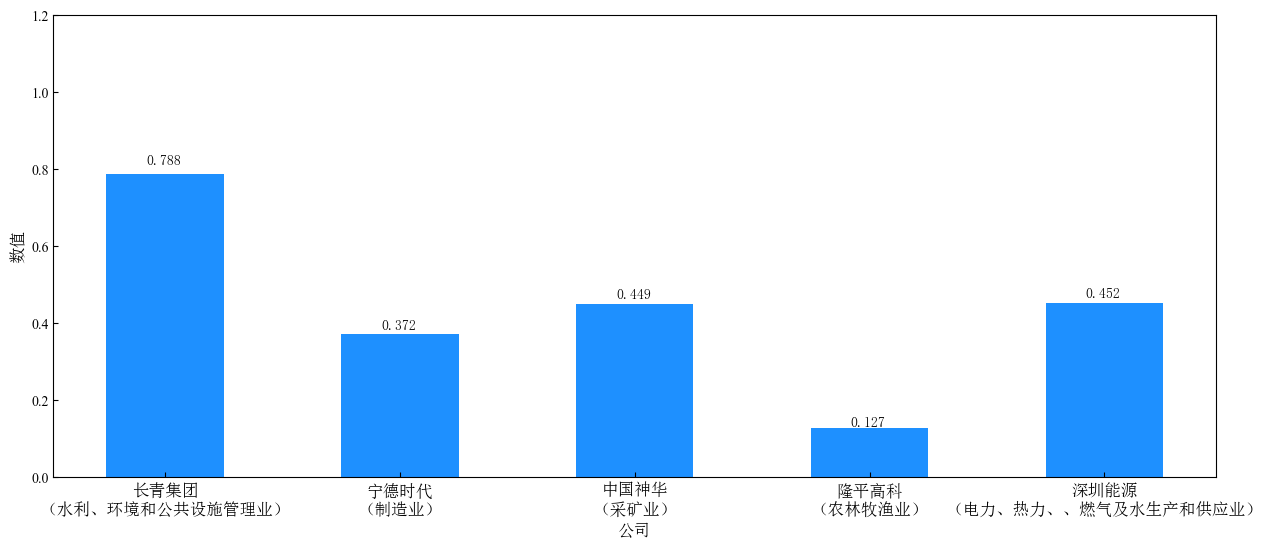

In [23]:
value = [0.788, 0.372, 0.449, 0.127, 0.452]
name = ['长青集团\n（水利、环境和公共设施管理业）', '宁德时代\n（制造业）', '中国神华\n（采矿业）','隆平高科\n（农林牧渔业）', '深圳能源\n（电力、热力、、燃气及水生产和供应业）']

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.-0.08, 1.03*height, '%s' % float(height), size=10, family='SimSun')

plt.figure(figsize=(15, 6))
cm = plt.bar(name, value, width=0.5, color='dodgerblue')
autolabel(cm)
plt.ylim((0, 1.2))
plt.xlabel('公司', size=12)
plt.ylabel('数值', size=12)
#plt.xticks(len(name),name, size = 10)
plt.yticks(fontproperties='Times New Roman', size = 10)
plt.show()

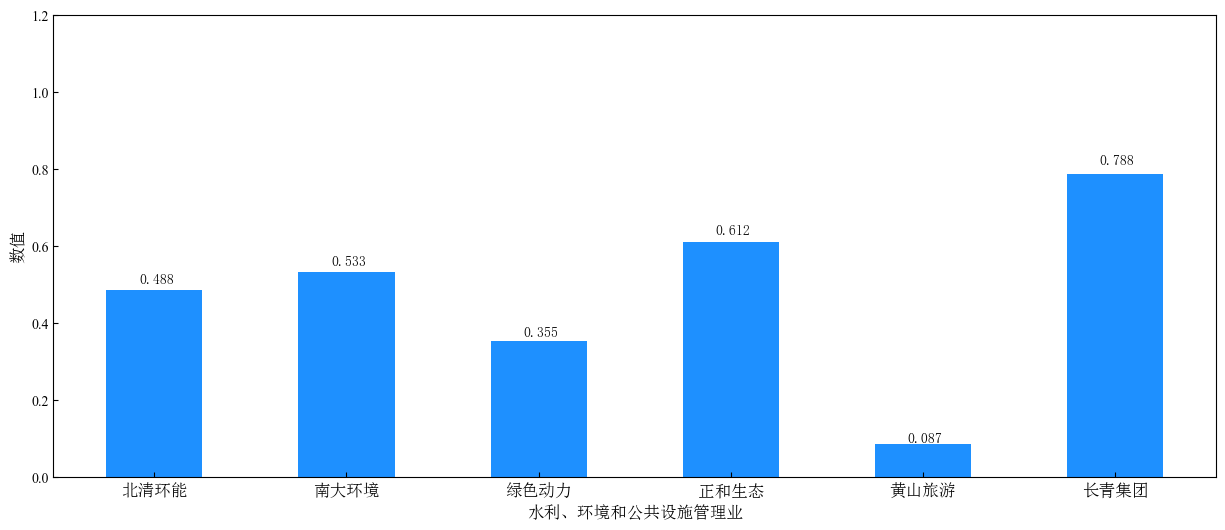

In [42]:
value_in = [0.488, 0.533, 0.355, 0.612, 0.087, 0.788]
name_in = ['北清环能', '南大环境' , "绿色动力", "正和生态", '黄山旅游', '长青集团']

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.-0.08, 1.03*height, '%s' % float(height), size=10, family='SimSun')

plt.figure(figsize=(15, 6))
cm = plt.bar(name_in, value_in, width=0.5, color='dodgerblue')
autolabel(cm)
plt.ylim((0, 1.2))
plt.xlabel('水利、环境和公共设施管理业', size=12)
plt.ylabel('数值', size=12)
#plt.xticks(len(name),name, size = 10)
plt.yticks(fontproperties='Times New Roman', size = 10)
plt.show()

# 一些功能函数

## 去除空格

In [1]:
contents = '   大家好， 欢迎一起来学习文本的空格   去除   ！'
print('处理前文本：'+contents)
def process(our_data):     #定义函数
    content = our_data.replace(' ','')   # 去掉文本中的空格
    print('处理后文本：'+content)
process(contents)

处理前文本：   大家好， 欢迎一起来学习文本的空格   去除   ！
处理后文本：大家好，欢迎一起来学习文本的空格去除！


## 去除空格的同时把！？省略号转换为句号

In [4]:
contents = '   大家好， 这里还有  很多的知识...一起拉学习吧 ！'
print('处理前文本：'+contents)
def process(data):     #定义函数
    content = data.replace(' ','')    # 去掉文本中的空格
    content = content.replace('...','。')    # 替换...
    content = content.replace('！','。')
    content = content.replace('？','。')
    print('处理后文本：'+content)
process(contents)

处理前文本：   大家好， 这里还有  很多的知识...一起拉学习吧 ！
处理后文本：大家好，这里还有很多的知识。一起拉学习吧。


## 让文本只保留汉字（和句号）

In [6]:
def is_chinese(uchar):
    if (uchar >= u'\u4e00' and uchar <= u'\u9fa5') or uchar==u'\u3002':  
    # 判断一个uchar是否是汉字,或者句号，用Unicode编码判断
        return True
    else:
        return False
 
def allcontents(contents):
    content = ''
    for i in contents:
        if is_chinese(i):
            content = content+i
    print('\n处理后的句子为:\n'+content)
 
centents = '1,2,3...我们开始吧， 加油。'
print('原句子为:\n'+centents)
allcontents(centents)

原句子为:
1,2,3...我们开始吧， 加油。

处理后的句子为:
我们开始吧加油。


## 文本中的表情符号去除

In [7]:
import re
sentence='现在听着音乐,duo rui mi,很开心*_*'
print('原句子为:\n'+sentence)
 
def clear_character(sentence):    
    pattern = re.compile("[^\u4e00-\u9fa5^,^.^!^a-z^A-Z^0-9]")  
    #只保留中英文、数字和符号，去掉其他东西
    #若只保留中英文和数字，则替换为[^\u4e00-\u9fa5^a-z^A-Z^0-9]
    line=re.sub(pattern,'',sentence)  #把文本中匹配到的字符替换成空字符
    new_sentence=''.join(line.split())    #去除空白
    print('\n处理后的句子为:\n'+new_sentence) 
 
clear_character(sentence)

原句子为:
现在听着音乐,duo rui mi,很开心*_*
现在听着音乐,duoruimi,很开心

处理后的句子为:
现在听着音乐,duoruimi,很开心


## 繁体中文与简体中文转换

In [ ]:
from opencc import OpenCC
 
sentence = '你现在读的这里是简体，這裡是繁體，能看懂嗎？'
print('原句子为:\n'+sentence)
 
 
def Simplified(sentence):
    new_sentence = Converter('zh-hans').convert(sentence)   # 繁体转为简体
    print('\n处理后的句子为:\n'+new_sentence) 
 
def Traditional(sentence):
    new_sentence = Converter('zh-hant').convert(sentence)   # 简体转为繁体
    print('\n处理后的句子为:\n'+new_sentence) 
 

Simplified(sentence)